In [13]:
import pandas as pd
from collections import Counter
import re
import numpy as np

In [14]:
comprehensive = "comprehensive_dataset.csv"

df_comprehensive = pd.read_csv(comprehensive)

df_comprehensive

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_7732/1156072642.py:3: DtypeWarning: Columns (11,12,13,14,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comprehensive = pd.read_csv(comprehensive)


,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,Sha_number,config_file,million,commit_count,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava
0,Amir13,Amir13/xlm-roberta-base-wnut2017,https://huggingface.co/Amir13/xlm-roberta-base...,token-classification,2.774636e+08,xlm-roberta,XLMRobertaForTokenClassification,individual,2023-02-14T13:19:51.000Z,2023-03-20T06:20:29.000Z,...,fed4801e50ef6521d2bcb5e962fe49c56ad64f68,dict_values('XLMRobertaForTokenClassification'...,277.46,11,2,0,card_found,['Amir13/wnut2017-persian'],NaN,NaN
1,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,f73141197960312741a1f3c91be0ebf71f371780,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,0,0,card_found,['argilla/ultrafeedback-binarized-preferences-...,NaN,NaN
2,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,f03058e7f15c0d1c542e32c88f7813a4dac7c33f,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN
3,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDChosen-S...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:34:10.000Z,2024-02-13T06:21:52.000Z,...,993476d6a1c2b8ee4894f9b63b449b6d42c6495f,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN
4,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV3-SOLIDChosen-S...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T01:39:24.000Z,2024-02-13T06:21:41.000Z,...,d23df4c9e2bc46656e4d894475d57584181b3a24,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,mgh6,mgh6/TCS_MLM,https://huggingface.co/mgh6/TCS_MLM,fill-mask,3.399402e+07,esm,EsmForMaskedLM,individual,2024-01-11T18:42:32.000Z,2024-02-16T04:06:02.000Z,...,6e3e9b02f3464305a3d7757b44b87650ae1278ec,"dict_values('EsmForMaskedLM', 'esm')",33.99,1112,0,0,no_card,NaN,NaN,NaN
52223,hiendang7613,hiendang7613/kgt5-model,https://huggingface.co/hiendang7613/kgt5-model,text2text-generation,6.522522e+07,t5,T5ForConditionalGeneration,individual,2024-01-25T13:26:29.000Z,2024-02-26T03:07:36.000Z,...,7bac57d0dc84dc6696058e42989224d495b41639,"dict_values('T5ForConditionalGeneration', 't5')",65.23,2205,0,0,no_card,NaN,NaN,NaN
52224,sign,sign/signwriting-clip,https://huggingface.co/sign/signwriting-clip,feature-extraction,2.128881e+08,vision-text-dual-encoder,VisionTextDualEncoderModel,0rganization,2024-01-08T13:47:03.000Z,2024-02-23T16:59:21.000Z,...,9e2464e40ff767a57ce331d13c7f63d904f30843,"dict_values('VisionTextDualEncoderModel', 'vis...",212.89,2593,0,0,no_card,NaN,NaN,NaN
52225,diegozs97,diegozs97/finetuned-chemprot-seed-4-1800k,https://huggingface.co/diegozs97/finetuned-che...,text-classification,1.800000e+06,bert,BertForSequenceClassification,individual,2022-03-02T23:29:05.000Z,2021-12-09T19:55:54.000Z,...,c7de07a1670e85386cabe7427e441a3019441bf6,"dict_values('BertForSequenceClassification', '...",1.80,NaN,0,0,no_card,NaN,NaN,NaN


In [15]:
item_lengths = []

for index, row in df_comprehensive.iterrows():
    owner = row["Owner"]
    model_name = row["model_name"]
    pipeline = row["pipeline"]
    
    renaming = model_name.replace("/", "-")#.replace("_", "-")
    splitting = renaming.split('-')
    item_lengths.append(len(splitting))

df_comprehensive['length_name'] = item_lengths

df_comprehensive

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,config_file,million,commit_count,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,length_name
0,Amir13,Amir13/xlm-roberta-base-wnut2017,https://huggingface.co/Amir13/xlm-roberta-base...,token-classification,2.774636e+08,xlm-roberta,XLMRobertaForTokenClassification,individual,2023-02-14T13:19:51.000Z,2023-03-20T06:20:29.000Z,...,dict_values('XLMRobertaForTokenClassification'...,277.46,11,2,0,card_found,['Amir13/wnut2017-persian'],NaN,NaN,5
1,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,0,0,card_found,['argilla/ultrafeedback-binarized-preferences-...,NaN,NaN,9
2,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,10
3,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDChosen-S...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:34:10.000Z,2024-02-13T06:21:52.000Z,...,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,10
4,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV3-SOLIDChosen-S...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T01:39:24.000Z,2024-02-13T06:21:41.000Z,...,"dict_values('MistralForCausalLM', 'mistral', {...",7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,mgh6,mgh6/TCS_MLM,https://huggingface.co/mgh6/TCS_MLM,fill-mask,3.399402e+07,esm,EsmForMaskedLM,individual,2024-01-11T18:42:32.000Z,2024-02-16T04:06:02.000Z,...,"dict_values('EsmForMaskedLM', 'esm')",33.99,1112,0,0,no_card,NaN,NaN,NaN,2
52223,hiendang7613,hiendang7613/kgt5-model,https://huggingface.co/hiendang7613/kgt5-model,text2text-generation,6.522522e+07,t5,T5ForConditionalGeneration,individual,2024-01-25T13:26:29.000Z,2024-02-26T03:07:36.000Z,...,"dict_values('T5ForConditionalGeneration', 't5')",65.23,2205,0,0,no_card,NaN,NaN,NaN,3
52224,sign,sign/signwriting-clip,https://huggingface.co/sign/signwriting-clip,feature-extraction,2.128881e+08,vision-text-dual-encoder,VisionTextDualEncoderModel,0rganization,2024-01-08T13:47:03.000Z,2024-02-23T16:59:21.000Z,...,"dict_values('VisionTextDualEncoderModel', 'vis...",212.89,2593,0,0,no_card,NaN,NaN,NaN,3
52225,diegozs97,diegozs97/finetuned-chemprot-seed-4-1800k,https://huggingface.co/diegozs97/finetuned-che...,text-classification,1.800000e+06,bert,BertForSequenceClassification,individual,2022-03-02T23:29:05.000Z,2021-12-09T19:55:54.000Z,...,"dict_values('BertForSequenceClassification', '...",1.80,NaN,0,0,no_card,NaN,NaN,NaN,6


In [16]:
deleted = df_comprehensive[pd.isna(df_comprehensive['Establishment'])]
deleted

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,config_file,million,commit_count,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,length_name


In [17]:
tokens = df_comprehensive.groupby('length_name')['model_name'].nunique()
less_removed = tokens[tokens>10]
#less_removed
tokens.sort_values(ascending=False)

length_name
2     12859
4      9409
5      8118
6      6360
3      6201
7      3714
8      3117
9      1125
10      522
15      289
11      224
12       90
21       71
13       47
19       43
14       29
16        6
17        1
20        1
Name: model_name, dtype: int64

In [18]:
tokens = df_comprehensive.groupby('length_name').agg({
    'model_name' : 'nunique',
    'Owner' : 'nunique'
}).reset_index()
#less_removed = tokens[tokens>10]
#less_removed
tokens.sort_values(by = 'length_name')

,length_name,model_name,Owner
0,2,12859,4368
1,3,6201,2862
2,4,9409,3980
3,5,8118,3346
4,6,6360,2944
5,7,3714,1601
6,8,3117,771
7,9,1125,418
8,10,522,165
9,11,224,85


In [19]:
totalling = sum(tokens['Owner'])
totalling

20628

In [20]:
tokens = df_comprehensive.groupby('length_name')['model_name'].nunique()
tokens.sort_values(ascending=False)

length_name
2     12859
4      9409
5      8118
6      6360
3      6201
7      3714
8      3117
9      1125
10      522
15      289
11      224
12       90
21       71
13       47
19       43
14       29
16        6
17        1
20        1
Name: model_name, dtype: int64

In [21]:
for_selection = df_comprehensive.groupby('length_name').agg({
    'model_name' : lambda x: list(x.unique()),
    'Owner' : lambda x: list(x.unique())
}).reset_index()
for_selection.sort_values(by='length_name', inplace=True)
for_selection

,length_name,model_name,Owner
0,2,[ArtifactAI/led_large_16384_arxiv_summarizatio...,"[ArtifactAI, kworts, ctheodoris, Den4ikAI, Ash..."
1,3,"[ibm/knowgl-large, climatebert/environmental-c...","[ibm, climatebert, Den4ikAI, Hexye, maastricht..."
2,4,"[ArianAskari/SOLID_SFT-WoDPO-WoMixQ, iulusoy/t...","[ArianAskari, iulusoy, RamAnanth1, Isotonic, m..."
3,5,"[Amir13/xlm-roberta-base-wnut2017, Jasontth/cl...","[Amir13, Jasontth, VMware, Addedk, Novocoders,..."
4,6,[konstantindobler/xlm-roberta-base-focus-germa...,"[konstantindobler, sarahmiller137, papluca, Mi..."
5,7,[botdevringring/nl-naxai-ai-sentiment-classifi...,"[botdevringring, konstantindobler, sarahmiller..."
6,8,[ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-...,"[ArianAskari, Mizuiro-sakura, abacusai, adamo1..."
7,9,[ohwi/japanese-stablelm-instruct-gamma-7b-dpo-...,"[ohwi, sarahmiller137, ALazcanoG, lewtun, eren..."
8,10,[ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejecte...,"[ArianAskari, sarahmiller137, one-man-army, dm..."
9,11,[eren23/ogno-monarch-jaskier-merge-7b-OH-PREF-...,"[eren23, daniel-was-taken, NasimB, btherien, k..."


In [22]:
import pandas as pd
import random

# Assuming 'for_selection' DataFrame is already created

# Calculate total number of owners
total_owners = sum(len(owner_list) for owner_list in for_selection['Owner'])

# Calculate percentage of each group's owners
for_selection['percentage'] = for_selection['Owner'].apply(lambda x: len(x) / total_owners)

# Calculate the number of model_names to select for each length_name based on Owner percentages
for_selection['model_count'] = (for_selection['percentage'] * 382).astype(int)

# Modify model_count to ensure it is at least 1
for_selection['model_count'] = for_selection['model_count'].apply(lambda x: max(x, 1))

# Initialize list to store final selection data
final_selection_data = []

# Iterate over each row in for_selection
for _, row in for_selection.iterrows():
    # Get the list of model_names for the current length_name
    model_names = row['model_name']
    
    # Calculate the number of model_names to select for the current length_name
    model_count = row['model_count']
    
    # Check if the model_names list is not empty and if model_count is greater than 0
    if model_names and model_count > 0:
        # Extract unique owners
        owners = set([name.split('/')[0].strip() for name in model_names])
        
        # Shuffle the model names
        random.shuffle(model_names)
        
        # Sample model names ensuring each owner is represented only once
        sampled_models = []
        sampled_owners = set()
        for model in model_names:
            owner = model.split('/')[0].strip()
            if owner not in sampled_owners and len(sampled_models) < model_count:
                sampled_models.append(model)
                sampled_owners.add(owner)
        
        # Append the sampled data to the final selection data
        for model in sampled_models:
            final_selection_data.append({'length_name': row['length_name'], 'selected_model': model})

# Create the final selection DataFrame
final_selection_df = pd.DataFrame(final_selection_data)

# Extract 'owner' from 'selected_model'
final_selection_df['owner'] = final_selection_df['selected_model'].str.split('/').str.get(0)

final_selection_df.to_csv("new_manual_analysis.csv", index = False)


# Display the final selection DataFrame
final_selection_df


,length_name,selected_model,owner
0,2,nkthakur/my_awesome_opus_books_model,nkthakur
1,2,Ruoyao/graph_th25_351_llama2_7b,Ruoyao
2,2,ashishkgpian/sharded_astromistral,ashishkgpian
3,2,CLindler/PublicResponseClassifier,CLindler
4,2,furrutiav/math_bert_qa_extractor_cockatiel_202...,furrutiav
...,...,...,...
379,16,simonycl/sparseIT_Llama-2-7b-hf-tulu-v2-mask-b...,simonycl
380,17,mtc/mistralai-Mistral-7B-v0.1-7b-xsum-with-all...,mtc
381,19,danielkty22/gpt2-ep-3.6-b-4-lr-4e-06-dp-0.1-ss...,danielkty22
382,20,danielkty22/probe_gpt2-medium-ep-1.0-b-4-lr-1e...,danielkty22


In [23]:
how_jk = final_selection_df.groupby('length_name')['owner'].nunique()
how_jk

length_name
2     80
3     53
4     73
5     61
6     54
7     29
8     14
9      7
10     3
11     1
12     1
13     1
14     1
15     1
16     1
17     1
19     1
20     1
21     1
Name: owner, dtype: int64

In [64]:
analyzed = "manually_analyzed.csv"
manual = pd.read_csv(analyzed)
manuals = manual[['length_name', 'owner', 'selected_model', 'Conventional naming']]
manuals = manuals.rename({'Conventional naming': 'naming_conv'}, axis=1)
manuals

,length_name,owner,selected_model,naming_conv
0,3,A-Bar,A-Bar/trainRanker_EN_EN,{identifier}{language}
1,4,abacaj,abacaj/phi-2-super,{identifier}
2,2,AbhishekkV19,AbhishekkV19/test_trainer,{task}
3,7,abiatarfestus,abiatarfestus/marian-finetuned-en_ng_bible-en-...,{identifier}{variant-type}{language}
4,2,abishines,abishines/my_awesome_wnut_model,{identifier}
...,...,...,...,...
379,6,yuchengc8123,yuchengc8123/esm2_t12_35M_UR50D-finetuned-loca...,{identifier}{size}{variant-type}{description}
380,3,yukiarimo,yukiarimo/Uta-AI,{identifier}
381,3,Yunong,Yunong/mistral-openpi_v2_llm_tasks,{base-model}{identifier}{version}{task}
382,6,Zardos,Zardos/Kant-Test-0.1-Mistral-7B,{identifier}{version}{base-model}{version}


In [65]:
group_man = manuals.groupby('naming_conv').agg({
    'owner' : 'nunique',
    'selected_model' : 'nunique'
}).reset_index()
group_man = group_man.sort_values(by = 'selected_model', ascending = False)
#top_10 = group_man.head(10)
#group_man.to_csv("top_10_convention.csv", index = False)
group_man

,naming_conv,owner,selected_model
57,{identifier},69,69
93,{identifier}{size},31,31
7,{base-model}{identifier},12,12
54,{description},11,11
125,{identifier}{version},10,10
...,...,...,...
53,{dataset}{size},1,1
52,{dataset}{base-model}{description},1,1
51,{base-model}{variant-type}{version},1,1
50,{base-model}{variant-type}{training-mechanism}...,1,1


In [66]:
def unique_to_string(arr):
    return ', '.join(arr)

# Group by 'naming_conv' and aggregate using the custom function
group_man = manuals.groupby('naming_conv').agg({
    'owner' : unique_to_string,
    'selected_model' : unique_to_string
}).reset_index()

# Sort the DataFrame by 'selected_model'
#group_man = group_man.sort_values(by='selected_model', ascending=False)

# Get the top 10 rows
#top_10 = group_man.head(10)

# Save to CSV
group_man.to_csv("top_10_convention2.csv", index=False)

In [67]:
group_man

,naming_conv,owner,selected_model
0,{ambiguous}{creation-date}{training-mechanism},stvhuang,stvhuang/rcr-run-b9bhsr7n-62291-master-0_20231...
1,{base-model},"moc1pher, modjo-ai","moc1pher/base_model_Llama2, modjo-ai/llama-1k"
2,{base-model}{dataset},"GuenterBlaeser, msznajder, mudogruer","GuenterBlaeser/roberta-base_imdb, msznajder/di..."
3,{base-model}{dataset}{size},ixa-ehu,ixa-ehu/roberta-eus-euscrawl-large-cased
4,{base-model}{dataset}{variant-type},gsomers-smarsh,gsomers-smarsh/distilgpt2-emailtype-finetune
...,...,...,...
143,{variant-type}{base-model}{size},derejee,derejee/Finetuned-Llama-2-13b
144,{variant-type}{description},murali07,murali07/finetuning-sentiment-model-3000-samples
145,{variant-type}{identifier},duraad,duraad/finetuning-b2b
146,{variant-type}{task}{description},libokuan,libokuan/finetuning-sentiment-model-3000-samples


In [68]:
import pandas as pd
from collections import Counter
import re

# List of strings
strings = manuals['naming_conv']

# Function to remove curly braces and explode
def remove_and_explode(string):
    # Remove curly braces and split based on '}{' pattern
    parts = re.findall(r'{(.*?)}', string)
    return parts

# Explode the strings and flatten the list
exploded_strings = [remove_and_explode(s) for s in strings]
extracted_items = [item for sublist in exploded_strings for item in sublist]

# Capitalize each item
extracted_items = [item.capitalize() for item in extracted_items]

# Count the occurrences of each item
item_counts = Counter(extracted_items)

# Create a DataFrame from the item counts
df = pd.DataFrame.from_dict(item_counts, orient='index', columns=['count'])

# Sort the DataFrame by count in descending order
df_sorted = df.sort_values(by='count', ascending=False)
df_sorted['percentage'] = (df_sorted['count']/sum(df_sorted['count']))*100

#df_sorted.to_csv('result.csv', index=False)
df_sorted

,count,percentage
Identifier,272,29.310345
Base-model,153,16.487069
Size,132,14.224138
Training-mechanism,77,8.297414
Description,59,6.357759
Variant-type,48,5.172414
Version,48,5.172414
Task,41,4.418103
Dataset,34,3.663793
Language,32,3.448276


In [69]:
manuals

,length_name,owner,selected_model,naming_conv
0,3,A-Bar,A-Bar/trainRanker_EN_EN,{identifier}{language}
1,4,abacaj,abacaj/phi-2-super,{identifier}
2,2,AbhishekkV19,AbhishekkV19/test_trainer,{task}
3,7,abiatarfestus,abiatarfestus/marian-finetuned-en_ng_bible-en-...,{identifier}{variant-type}{language}
4,2,abishines,abishines/my_awesome_wnut_model,{identifier}
...,...,...,...,...
379,6,yuchengc8123,yuchengc8123/esm2_t12_35M_UR50D-finetuned-loca...,{identifier}{size}{variant-type}{description}
380,3,yukiarimo,yukiarimo/Uta-AI,{identifier}
381,3,Yunong,Yunong/mistral-openpi_v2_llm_tasks,{base-model}{identifier}{version}{task}
382,6,Zardos,Zardos/Kant-Test-0.1-Mistral-7B,{identifier}{version}{base-model}{version}


In [70]:
# Function to expand rows based on items within curly braces
def expand_rows(row):
    naming_conv = row['naming_conv']
    items = [item.strip('{}') for item in naming_conv.split('}{')]
    rows = []
    for item in items:
        new_row = row.copy()
        new_row['naming_conv'] = item
        rows.append(new_row)
    return rows

# Apply the function to expand rows
expanded_rows = []
for idx, row in manuals.iterrows():
    expanded_rows.extend(expand_rows(row))

# Create DataFrame from expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Print the resulting DataFrame
expanded_df

,length_name,owner,selected_model,naming_conv
0,3,A-Bar,A-Bar/trainRanker_EN_EN,identifier
0,3,A-Bar,A-Bar/trainRanker_EN_EN,language
1,4,abacaj,abacaj/phi-2-super,identifier
2,2,AbhishekkV19,AbhishekkV19/test_trainer,task
3,7,abiatarfestus,abiatarfestus/marian-finetuned-en_ng_bible-en-...,identifier
...,...,...,...,...
382,6,Zardos,Zardos/Kant-Test-0.1-Mistral-7B,base-model
382,6,Zardos,Zardos/Kant-Test-0.1-Mistral-7B,version
383,7,zihoh,zihoh/marian-random-kde4-en-to-fr,base-model
383,7,zihoh,zihoh/marian-random-kde4-en-to-fr,training-mechanism


In [71]:
expanded_df.to_csv("naming_convention_terms.csv", index=False)

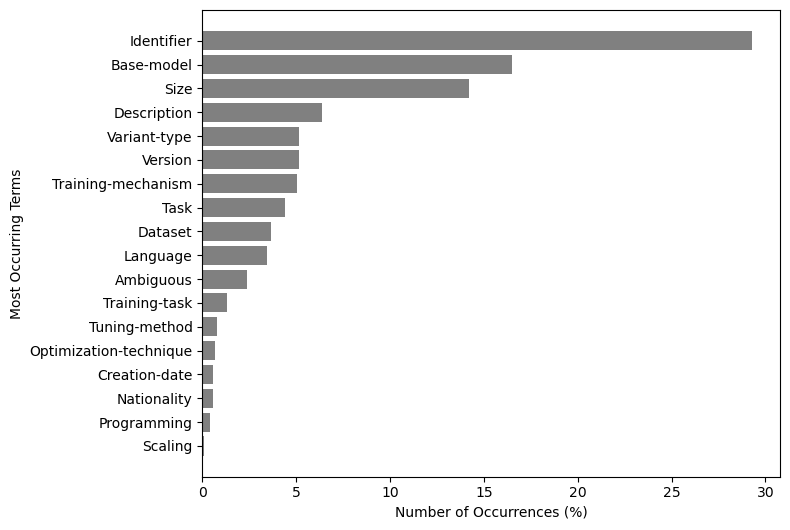

In [53]:
import matplotlib.pyplot as plt

# Plot the DataFrame with adjusted figure size
plt.figure(figsize=(8, 0.3 * len(df_sorted)))  # Increase height based on the number of rows
plt.barh(df_sorted.index, df_sorted['percentage'], color='grey')
plt.xlabel('Number of Occurrences (%)')
plt.ylabel('Most Occurring Terms')
#plt.title('Percentage of Keywords')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("convention.pdf")
plt.show()


In [69]:
no_deleted = df_comprehensive[pd.isna(df_comprehensive['Establishment'])]

taken = df_comprehensive

item_versions = []

for index, row in taken.iterrows():
    owner = row["Owner"]
    model_name = row["model_name"]
    pipeline = row["pipeline"]
    
    try:
        version_match = re.search(r'[-_]v(\d+(\.\d+)?)$', model_name)
        if version_match:
            version = version_match.group(1)
        else:
            version = 'none'
    except KeyError:
        version = "none"
            
    item_versions.append("v"+version)

df_comprehensive['ver'] = item_versions
def categorize_version(version):
    if version.startswith('v') and (version != 'vnone') and 1 <= len(version[1:]) <= 3 and all(char.isdigit() for char in version[1:]):
        return 'short'
    elif re.match(r'^v\d+\.\d{3}$', version):
        return '3_digit_decimal'
    elif re.match(r'^v\d+\.\d{2}$', version):
        return '2_digit_decimal'
    elif re.match(r'^v\d+\.\d$', version):
        return '1_digit_decimal'
    elif re.match(r'^v\d+$', version):
        return 'long'
    else:
        return 'none'

taken['version_group'] = taken['ver'].apply(categorize_version) 
taken

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,development,Sha_number,config_file,million,commit_count,pull_count,discussion_count,model_card,ver,version_group
0,athirdpath,athirdpath/Eileithyia-20b,https://huggingface.co/athirdpath/Eileithyia-20b,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-11-28T04:24:52.000Z,2023-11-28T04:46:12.000Z,...,none,845a2de0b9436a4d624e33b3699abdbdcf7258a5,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,none
1,R136a1,R136a1/TimeLess-20B,https://huggingface.co/R136a1/TimeLess-20B,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-12-03T07:43:59.000Z,2023-12-03T09:02:41.000Z,...,none,90ea55ba8a8702b8e5bc898519619f4456119a5e,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,none
2,athirdpath,athirdpath/Iambe-RP-cDPO-20b,https://huggingface.co/athirdpath/Iambe-RP-cDP...,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-12-07T04:00:57.000Z,2023-12-09T21:53:23.000Z,...,none,c93855418dbdf2b0c7b9e3f7a880093ac33ec38d,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,none
3,athirdpath,athirdpath/Iambe-RP-DARE-20b,https://huggingface.co/athirdpath/Iambe-RP-DAR...,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-12-10T09:42:08.000Z,2023-12-10T20:44:30.000Z,...,none,895640891a1e4fac0d6166760ae08d28ca9e7eb6,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,none
4,ammarnasr,ammarnasr/custom-adaclip,https://huggingface.co/ammarnasr/custom-adaclip,feature-extraction,7.313792e+06,adaclip,AdaclipModel,individual,2024-03-11T13:41:45.000Z,2024-03-12T01:53:41.000Z,...,none,56685f33f5b4bd3b69c167e9c9dc6678251da769,"dict_values('AdaclipModel', {'AutoConfig': 'am...",7.31,2.0,0.0,0.0,card_found,vnone,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,AvizNetworks,AvizNetworks/ncp-base-wikisql,https://huggingface.co/AvizNetworks/ncp-base-w...,text-generation,7.241732e+09,mistral,MistralForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,7241.73,NaN,NaN,NaN,NaN,vnone,none
52223,DmitriiKhizbullin,DmitriiKhizbullin/mg,https://huggingface.co/DmitriiKhizbullin/mg,text-generation,7.241732e+09,mistral,MistralForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,7241.73,NaN,NaN,NaN,NaN,vnone,none
52224,projectbaraat,projectbaraat/baarat-MOE-Hindi-v0.1,https://huggingface.co/projectbaraat/baarat-MO...,text-generation,1.985512e+10,mixtral,MixtralForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,19855.12,NaN,NaN,NaN,NaN,v0.1,1_digit_decimal
52225,Walmart-the-bag,Walmart-the-bag/phi-2-uncensored,https://huggingface.co/Walmart-the-bag/phi-2-u...,text-generation,2.779684e+09,phi-msft,PhiForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,2779.68,NaN,NaN,NaN,NaN,vnone,none


In [70]:
takenone = taken[taken['ver'] != 'vnone']
versioning_taken = takenone.groupby('version_group').agg({
    'Owner': 'nunique',
    'model_name': 'nunique',
    'ver': 'nunique'
}).reset_index()

versioning_taken.rename({'version_group': "Versioning Convention"}, axis=1, inplace=True)


so_taken = versioning_taken.sort_values(by='Owner', ascending=False)

taken_owners = so_taken['Owner'].sum()
taken_models = so_taken['model_name'].sum()
taken_versions = so_taken['ver'].sum()

so_taken['Owners(%)'] = (so_taken['Owner'] / taken_owners) * 100
so_taken['Models(%)'] = (so_taken['model_name'] / taken_models) * 100
so_taken['Unique Instances(%)'] = (so_taken['ver'] / taken_versions) * 100

so_taken
#so.tail(40)

,Versioning Convention,Owner,model_name,ver,Owners(%),Models(%),Unique Instances(%)
4,short,855,2326,43,67.803331,67.012388,29.251701
0,1_digit_decimal,392,1085,53,31.086439,31.259003,36.054422
1,2_digit_decimal,11,51,42,0.872324,1.469317,28.571429
3,long,2,3,3,0.158604,0.086430,2.040816
2,3_digit_decimal,1,6,6,0.079302,0.172861,4.081633


In [48]:
no_deleted = df_comprehensive[pd.isna(df_comprehensive['Establishment'])]


item_versions = []

for index, row in df_comprehensive.iterrows():
    owner = row["Owner"]
    model_name = row["model_name"]
    pipeline = row["pipeline"]
    
    try:
        version_match = re.search(r'[-_]v(\d+(\.\d+)?)$', model_name)
        if version_match:
            version = version_match.group(1)
        else:
            version = 'none'
    except KeyError:
        version = "none"
            
    item_versions.append("v"+version)

df_comprehensive['ver'] = item_versions
def categorize_version(version):
    if version.startswith('v'):
        num_str = version[1:]
        if '.' not in num_str:
            return 'major'
        else:
            dot_count = num_str.count('.')
            if dot_count == 1:
                return 'minor'
            elif dot_count == 2:
                return 'patches'
            elif dot_count == 3:
                return 'negligent'
            else:
                return 'invalid'
    else:
        return 'invalid'

df_comprehensive['version_group'] = df_comprehensive['ver'].apply(categorize_version) 
df_comprehensive

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,development,Sha_number,config_file,million,commit_count,pull_count,discussion_count,model_card,ver,version_group
0,athirdpath,athirdpath/Eileithyia-20b,https://huggingface.co/athirdpath/Eileithyia-20b,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-11-28T04:24:52.000Z,2023-11-28T04:46:12.000Z,...,none,845a2de0b9436a4d624e33b3699abdbdcf7258a5,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,major
1,R136a1,R136a1/TimeLess-20B,https://huggingface.co/R136a1/TimeLess-20B,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-12-03T07:43:59.000Z,2023-12-03T09:02:41.000Z,...,none,90ea55ba8a8702b8e5bc898519619f4456119a5e,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,major
2,athirdpath,athirdpath/Iambe-RP-cDPO-20b,https://huggingface.co/athirdpath/Iambe-RP-cDP...,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-12-07T04:00:57.000Z,2023-12-09T21:53:23.000Z,...,none,c93855418dbdf2b0c7b9e3f7a880093ac33ec38d,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,major
3,athirdpath,athirdpath/Iambe-RP-DARE-20b,https://huggingface.co/athirdpath/Iambe-RP-DAR...,text-generation,2.000000e+10,llama,LlamaForCausalLM,individual,2023-12-10T09:42:08.000Z,2023-12-10T20:44:30.000Z,...,none,895640891a1e4fac0d6166760ae08d28ca9e7eb6,"dict_values('LlamaForCausalLM', 'llama', {'bos...",20000.00,0.0,0.0,0.0,card_found,vnone,major
4,ammarnasr,ammarnasr/custom-adaclip,https://huggingface.co/ammarnasr/custom-adaclip,feature-extraction,7.313792e+06,adaclip,AdaclipModel,individual,2024-03-11T13:41:45.000Z,2024-03-12T01:53:41.000Z,...,none,56685f33f5b4bd3b69c167e9c9dc6678251da769,"dict_values('AdaclipModel', {'AutoConfig': 'am...",7.31,2.0,0.0,0.0,card_found,vnone,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,AvizNetworks,AvizNetworks/ncp-base-wikisql,https://huggingface.co/AvizNetworks/ncp-base-w...,text-generation,7.241732e+09,mistral,MistralForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,7241.73,NaN,NaN,NaN,NaN,vnone,major
52223,DmitriiKhizbullin,DmitriiKhizbullin/mg,https://huggingface.co/DmitriiKhizbullin/mg,text-generation,7.241732e+09,mistral,MistralForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,7241.73,NaN,NaN,NaN,NaN,vnone,major
52224,projectbaraat,projectbaraat/baarat-MOE-Hindi-v0.1,https://huggingface.co/projectbaraat/baarat-MO...,text-generation,1.985512e+10,mixtral,MixtralForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,19855.12,NaN,NaN,NaN,NaN,v0.1,minor
52225,Walmart-the-bag,Walmart-the-bag/phi-2-uncensored,https://huggingface.co/Walmart-the-bag/phi-2-u...,text-generation,2.779684e+09,phi-msft,PhiForCausalLM,NaN,NaN,NaN,...,NaN,NaN,NaN,2779.68,NaN,NaN,NaN,NaN,vnone,major


In [61]:
vernone = df_comprehensive[df_comprehensive['ver'] != 'vnone']
versioning = vernone.groupby('version_group').agg({
    'Owner': 'nunique',
    'model_name': 'nunique',
    'ver': 'nunique'
}).reset_index()

versioning.rename({'version_group': "Versioning Convention"}, axis=1, inplace=True)


so = versioning.sort_values(by='Owner', ascending=False)

total_owners = so['Owner'].sum()
total_models = so['model_name'].sum()
total_versions = so['ver'].sum()

so['Owners(%)'] = (so['Owner'] / total_owners) * 100
so['Models(%)'] = (so['model_name'] / total_models) * 100
so['Unique Instances(%)'] = (so['ver'] / total_versions) * 100

so
#so.tail(40)

,Versioning Convention,Owner,model_name,ver,Owners(%),Models(%),Unique Instances(%)
0,major,857,2329,46,68.450479,67.098819,31.292517
1,minor,395,1142,101,31.549521,32.901181,68.707483


In [63]:
first_record = vernone.groupby('Owner').agg({
    'model_name' : 'first',
    'version_group' : 'first',
    'ver' : 'first'
}).reset_index()
first_record

,Owner,model_name,version_group,ver
0,0dAI,0dAI/0dAI-7.5B-v2,major,v2
1,0x0dad0,0x0dad0/pretrain_v2,major,v2
2,0x7o,0x7o/fialka-13B-v1,major,v1
3,0xnu,0xnu/AGTD-v0.1,minor,v0.1
4,2bytescorp,2bytescorp/2b_mt_mistral_7b_ft_ko-en_QLoRA_v0.1,minor,v0.1
...,...,...,...,...
1164,zioBoe,zioBoe/tinyllama-emo-v1,major,v1
1165,zlsl,zlsl/l_erotic_chat_v2,major,v2
1166,zwaarcontrast,zwaarcontrast/lilt-xlm-roberta-base-finetuned-...,major,v1
1167,zyh3826,zyh3826/llama2-13b-ft-openllm-leaderboard-v1,major,v1


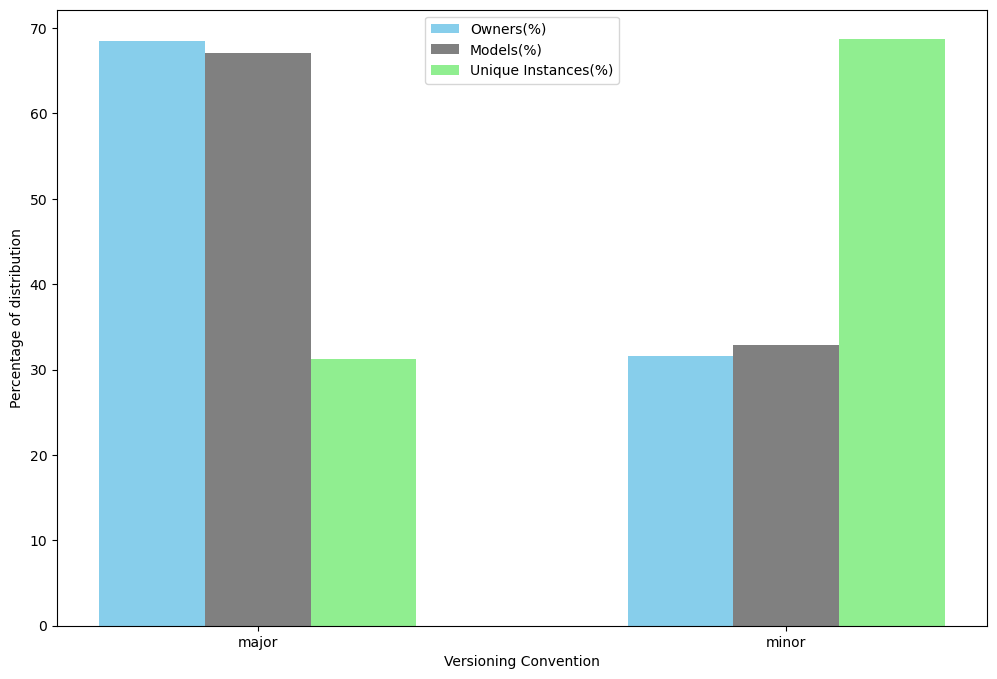

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of categories
num_categories = len(so)

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(num_categories)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for Owners(%)
ax.bar(index - bar_width, so['Owners(%)'], bar_width, color='skyblue', label='Owners(%)')

# Plot bars for Models(%)
ax.bar(index, so['Models(%)'], bar_width, color='Grey', label='Models(%)')

# Plot bars for Unique Instances(%)
ax.bar(index + bar_width, so['Unique Instances(%)'], bar_width, color='lightgreen', label='Unique Instances(%)')

# Set x-axis labels
ax.set_xticks(index)
ax.set_xticklabels(so['Versioning Convention'])
ax.set_xlabel('Versioning Convention')

# Set y-axis label
ax.set_ylabel('Percentage of distribution')

# Set title
#ax.set_title('Distribution of Metrics by Versioning Convention')

# Add legend at a different position (upper left)
ax.legend(loc='upper center')
plt.savefig("versioning_convention.pdf")

# Show plot
plt.show()


In [ ]:
from_first = first_record.groupby('version_group')['Owner'].nunique()
getit = from_first.sort_values(ascending=True)
getit

In [72]:
data1 = "commits_0_20k.csv"
data2 = "commits_20k_onward.csv"

df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)

df1 = df1[df1['commit_file'] != 'commit_file']
df2 = df2[df2['commit_file'] != 'commit_file']

df1 = df1[df1['change_frequency'] != 'change_frequency']
df2 = df2[df2['change_frequency'] != 'change_frequency']

df1 = df1[df1['change_frequency'] != '-1']
df2 = df2[df2['change_frequency'] != '-1']

df1 = df1[df1['change_frequency'] != '-2']
df2 = df2[df2['change_frequency'] != '-2']

df1 = df1[df1['commit_file'].str.match(r'^https://huggingface.co/[^/]+/[^/]+/.+$')]
df2 = df2[df2['commit_file'].str.match(r'^https://huggingface.co/[^/]+/[^/]+/.+$')]

In [74]:
def extract_info(url):
    if url.startswith("https://huggingface.co"):
        # Extract owner, model_name, and file using regex
        match = re.match(r'^https://huggingface.co/([^/]+)/([^/]+)/(.+)$', url)
        if match:
            return match.groups()
    return None, None, None


df1[['owner', 'model_name', 'file']] = df1['commit_file'].apply(extract_info).apply(pd.Series)
df2[['owner', 'model_name', 'file']] = df2['commit_file'].apply(extract_info).apply(pd.Series)

In [149]:
df = pd.concat([df1, df2], ignore_index=True)

df.rename(columns={'file': 'file_changed', 'change_frequency': 'commit_hash', 'commit_file': 'file_location'}, inplace=True)

# Rearrange the columns
df = df[['owner', 'model_name', 'file_changed', 'commit_hash', 'file_location']]
df['file_extension'] = df['file_changed'].str.extract(r'(\.\w+)$')

# Split values in 'commit_hash' column and explode into multiple rows
df['commit_hash'] = df['commit_hash'].str.split(',')
df = df.explode('commit_hash')

df

,owner,model_name,file_changed,commit_hash,file_location,file_extension
0,athirdpath,Eileithyia-20b,.gitattributes,ba34c593ca9df710d9654810d3daf93ae5f71637,https://huggingface.co/athirdpath/Eileithyia-2...,.gitattributes
1,athirdpath,Eileithyia-20b,added_tokens.json,6fc8a349641d9a00a900a660ca5ab386ea83dd0a,https://huggingface.co/athirdpath/Eileithyia-2...,.json
2,athirdpath,Eileithyia-20b,config.json,6fc8a349641d9a00a900a660ca5ab386ea83dd0a,https://huggingface.co/athirdpath/Eileithyia-2...,.json
3,athirdpath,Eileithyia-20b,generation_config.json,6fc8a349641d9a00a900a660ca5ab386ea83dd0a,https://huggingface.co/athirdpath/Eileithyia-2...,.json
4,athirdpath,Eileithyia-20b,pytorch_model-00001-of-00009.bin,6fc8a349641d9a00a900a660ca5ab386ea83dd0a,https://huggingface.co/athirdpath/Eileithyia-2...,.bin
...,...,...,...,...,...,...
601683,tweettemposhift,ner-ner_random1_seed2-twitter-roberta-base-202...,tokenizer_config.json,afbe1b9bc98f6d5e69758bfe905f6872ff058e81,https://huggingface.co/tweettemposhift/ner-ner...,.json
601684,tweettemposhift,ner-ner_random1_seed2-twitter-roberta-base-202...,vocab.json,afbe1b9bc98f6d5e69758bfe905f6872ff058e81,https://huggingface.co/tweettemposhift/ner-ner...,.json
601685,tweettemposhift,ner-ner_random1_seed2-twitter-roberta-base-202...,summary.json,c0812d8154dd79707fe7055a46ebd679c64416dd,https://huggingface.co/tweettemposhift/ner-ner...,.json
601685,tweettemposhift,ner-ner_random1_seed2-twitter-roberta-base-202...,summary.json,f7cb4f3a6ca7eb46f2ce67eb32140f89f3ba4048,https://huggingface.co/tweettemposhift/ner-ner...,.json


In [77]:
df.to_csv('exploded_changed_file.csv', index=False)

In [150]:
changed_file_frequency = df.groupby(['owner', 'model_name', 'file_changed', 'file_extension']).size().reset_index(name='changed_frequency')

changed_file_frequency

,owner,model_name,file_changed,file_extension,changed_frequency
0,0-hero,flan-OIG-base,.gitattributes,.gitattributes,1
1,0-hero,flan-OIG-base,config.json,.json,1
2,0-hero,flan-OIG-base,generation_config.json,.json,1
3,0-hero,flan-OIG-base,model.safetensors,.safetensors,1
4,0-hero,flan-OIG-base,pytorch_model.bin,.bin,1
...,...,...,...,...,...
596901,zzz99,output-7b-26k-lora-test-afternoon,tokenizer.json,.json,1
596902,zzz99,output-7b-26k-lora-test-afternoon,tokenizer_config.json,.json,1
596903,zzzzzioni,added-patent-tokens-KR-SBERT-V40K-klueNLI-augSTS,.gitattributes,.gitattributes,1
596904,zzzzzioni,added-patent-tokens-KR-SBERT-V40K-klueNLI-augSTS,config.json,.json,1


In [79]:
changed_file_frequency.to_csv("frequency_of_changed_file.csv", index = False)

In [92]:
#file_extension_filtered = changed_file_frequency[~changed_file_frequency['file_extension'].str.contains(r'\d')]
file_extesion = changed_file_frequency.groupby('file_extension').agg({
    'changed_frequency' : 'sum',
    'model_name' : 'nunique',
    'owner' : 'nunique'
}).reset_index()

file_extesion = file_extesion.sort_values(by='changed_frequency', ascending=False)

file_extesion.to_csv("file_extension_and_frequencies.csv", index = False)

file_extesion

,file_extension,changed_frequency,model_name,owner
326,.json,366734,45175,13321
401,.safetensors,328439,41690,12469
259,.bin,121478,21656,8757
337,.md,106976,30579,10062
0,.0,101283,6002,4187
...,...,...,...,...
376,.pbtxt,1,1,1
87,.173,1,1,1
287,.electra,1,1,1
86,.172,1,1,1


In [83]:
# Define a function to categorize file extensions
def categorize_file_extension(ext):
    code_extensions = ['.py', '.ipynb', '.sh', '.codes', '.cpp', '.cu', '.so', '.bsh']
    data_config_extensions = ['.json', '.gitattributes', '.yml', '.gitignore', '.spm', '.weight', '.pkl', '.gguf',
                              '.jsonl', '.wandb', '.yaml', '.npy', '.onnx_data', '.pickle', '.arrow', '.tsv',
                              '.parquet', '.xml', '.db', '.fasta', '.npz', '.joblib', '.css', '.dat', '.toml',
                              '.conf', '.config', '.ini', '.cfg']
    documentation_extensions = ['.md', '.txt', '.csv', '.pdf', '.text', '.vocab', '.MD', '.xlsx', '.pbtxt', '.docx']
    model_extensions = ['.safetensors', '.bin', '.pt', '.model', '.pth', '.onnx', '.torch', '.meta', '.tflite',
                        '.mlmodel', '.ckpt', '.mdl', '.pb', '.safetensor', '.safetensorsx', '.safe_tensors',
                        '.safetensorss']
    
    if ext in code_extensions:
        return 'Code Files'
    elif ext in data_config_extensions:
        return 'Data & Configuration Files'
    elif ext in documentation_extensions:
        return 'Documentation Files'
    elif ext in model_extensions:
        return 'Model Files'
    else:
        return 'Other Files'

# Apply the categorization function to the file_extension column
changed_file_frequency['category'] = changed_file_frequency['file_extension'].apply(categorize_file_extension)

# Group by the categorized file_extension column
file_extension_grouped = changed_file_frequency.groupby('category').agg({
    'changed_frequency': 'sum',
    'model_name': 'nunique',
    'owner': 'nunique'
}).reset_index()

# Sort the grouped DataFrame by changed_frequency in descending order
file_extension_grouped = file_extension_grouped.sort_values(by='changed_frequency', ascending=False)

# Save the results to a CSV file
file_extension_grouped.to_csv("file_extension_and_frequencies.csv", index=False)

# Display the grouped DataFrame
file_extension_grouped
file_extension_grouped

,category,changed_frequency,model_name,owner
3,Model Files,524419,45117,13307
1,Data & Configuration Files,435489,45175,13321
4,Other Files,177353,9560,5146
2,Documentation Files,136735,35492,11468
0,Code Files,8878,2183,963


In [84]:
visualization = changed_file_frequency[['category','changed_frequency']]

,owner,model_name,file_changed,file_extension,changed_frequency,category
0,0-hero,flan-OIG-base,.gitattributes,.gitattributes,1,Data & Configuration Files
1,0-hero,flan-OIG-base,config.json,.json,1,Data & Configuration Files
2,0-hero,flan-OIG-base,generation_config.json,.json,1,Data & Configuration Files
3,0-hero,flan-OIG-base,model.safetensors,.safetensors,1,Model Files
4,0-hero,flan-OIG-base,pytorch_model.bin,.bin,1,Model Files
...,...,...,...,...,...,...
596901,zzz99,output-7b-26k-lora-test-afternoon,tokenizer.json,.json,1,Data & Configuration Files
596902,zzz99,output-7b-26k-lora-test-afternoon,tokenizer_config.json,.json,1,Data & Configuration Files
596903,zzzzzioni,added-patent-tokens-KR-SBERT-V40K-klueNLI-augSTS,.gitattributes,.gitattributes,1,Data & Configuration Files
596904,zzzzzioni,added-patent-tokens-KR-SBERT-V40K-klueNLI-augSTS,config.json,.json,1,Data & Configuration Files


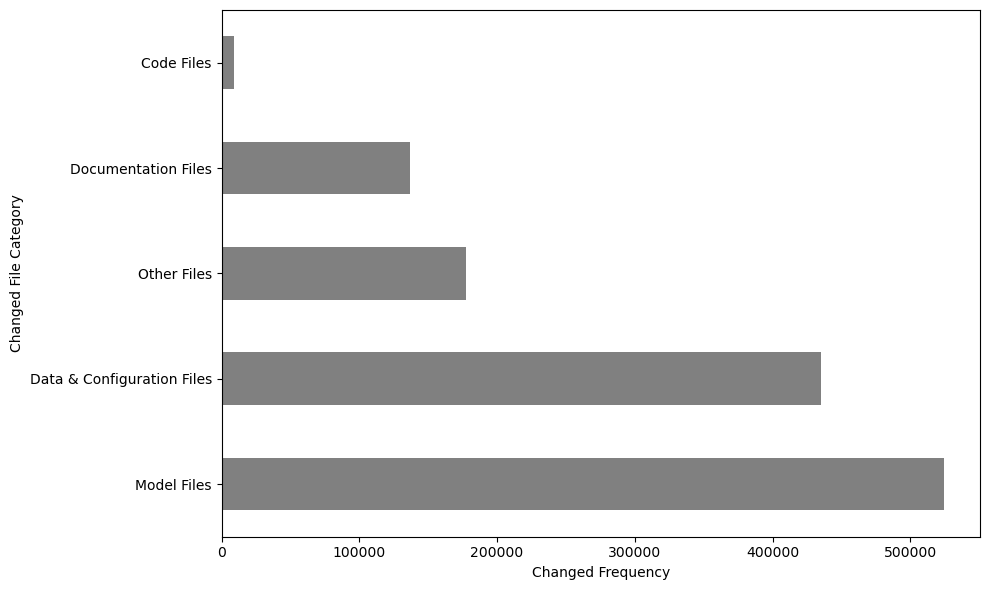

In [91]:
import matplotlib.pyplot as plt

# Assuming `changed_file_frequency` is a DataFrame containing the file frequencies
# with columns 'category' and 'changed_frequency'

# Group by category and sum the changed frequencies
visualization = changed_file_frequency.groupby('category')['changed_frequency'].sum()

# Transpose the DataFrame
visualization = visualization.transpose()

# Sort values in descending order
visualization = visualization.sort_values(ascending=False)

# Plotting
visualization.plot(kind='barh', figsize=(10, 6), color='grey')  # Use barh for horizontal bar plot
#plt.title('Changed File Frequency by Category')
plt.xlabel('Changed Frequency')
plt.ylabel('Changed File Category')
plt.tight_layout()
plt.savefig("changed_file.pdf")
plt.show()


In [106]:
visualization

category
Model Files                   524419
Data & Configuration Files    435489
Other Files                   177353
Documentation Files           136735
Code Files                      8878
Name: changed_frequency, dtype: int64

In [103]:
average = changed_file_frequency.groupby('category')['changed_frequency'].sum()
owners = changed_file_frequency.groupby('category')['owner'].nunique()
avg_changes = average/owners

avg_changes

category
Code Files                     9.219107
Data & Configuration Files    32.691915
Documentation Files           11.923178
Model Files                   39.409258
Other Files                   34.464244
dtype: float64

In [105]:
average_change_file = changed_file_frequency.groupby('category')['changed_frequency'].sum()
averge_model = changed_file_frequency.groupby('category')['model_name'].nunique()
avg_changes_model = average_change/averge_model

avg_changes_model

category
Code Files                     4.066880
Data & Configuration Files     9.640044
Documentation Files            3.852558
Model Files                   11.623534
Other Files                   18.551569
dtype: float64

In [100]:
owners_changed = changed_file_frequency.groupby('category')['owner'].nunique()
all_owner = sum(changed_file_frequency.groupby('category')['owner'].nunique())
percentage = (owners_changed/all_owner)*100
percentage

category
Code Files                     2.178487
Data & Configuration Files    30.134600
Documentation Files           25.942767
Model Files                   30.102930
Other Files                   11.641217
Name: owner, dtype: float64

In [104]:
model_changed = changed_file_frequency.groupby('category')['model_name'].nunique()
all_model = sum(changed_file_frequency.groupby('category')['model_name'].nunique())
percentage_model = (model_changed/all_model)*100
percentage_model

category
Code Files                     1.587325
Data & Configuration Files    32.848095
Documentation Files           25.807296
Model Files                   32.805922
Other Files                    6.951362
Name: model_name, dtype: float64

In [111]:
model_files = changed_file_frequency[changed_file_frequency["category"] == 'Model Files']
model_files['file_extension'] = model_files['file_extension'].replace(['.safe_tensors', '.safetensor', '.safetensorss', '.safetensorsx'], '.safetensors')
model_files['file_extension'] = model_files['file_extension'].replace(['.torch', '.pth'], '.pt')
model_files

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_24440/831184785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_files['file_extension'] = model_files['file_extension'].replace(['.safe_tensors', '.safetensor', '.safetensorss', '.safetensorsx'], '.safetensors')
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_24440/831184785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_files['file_extension'] = model_files['file_extension'].replace(['.torch', '.pth'], '.pt')


,owner,model_name,file_changed,file_extension,changed_frequency,category
3,0-hero,flan-OIG-base,model.safetensors,.safetensors,1,Model Files
4,0-hero,flan-OIG-base,pytorch_model.bin,.bin,1,Model Files
6,0-hero,flan-OIG-base,spiece.model,.model,1,Model Files
12,0-hero,flan-OIG-small,model.safetensors,.safetensors,1,Model Files
13,0-hero,flan-OIG-small,pytorch_model.bin,.bin,1,Model Files
...,...,...,...,...,...,...
596888,zzxslp,RadBERT-RoBERTa-4m,training_args.bin,.bin,1,Model Files
596895,zzz99,output-7b-26k-lora-test-afternoon,model-00001-of-00003.safetensors,.safetensors,1,Model Files
596896,zzz99,output-7b-26k-lora-test-afternoon,model-00002-of-00003.safetensors,.safetensors,1,Model Files
596897,zzz99,output-7b-26k-lora-test-afternoon,model-00003-of-00003.safetensors,.safetensors,1,Model Files


In [112]:
change_frequency = model_files.groupby('file_extension')['changed_frequency'].sum()
change_frequency

file_extension
.bin            121478
.ckpt               23
.mdl                 7
.meta               77
.mlmodel            36
.model           21014
.onnx             1054
.pb                  6
.pt              52225
.safetensors    328446
.tflite             53
Name: changed_frequency, dtype: int64

In [ ]:
.bin            
.ckpt            
.mdl              
.meta             
.mlmodel           
.model           
.onnx             
.pb               
.pt              
.pth            
.safe_tensors      
.safetensor       
.safetensors    
.safetensorss     
.safetensorsx     
.tflite          
.torch           

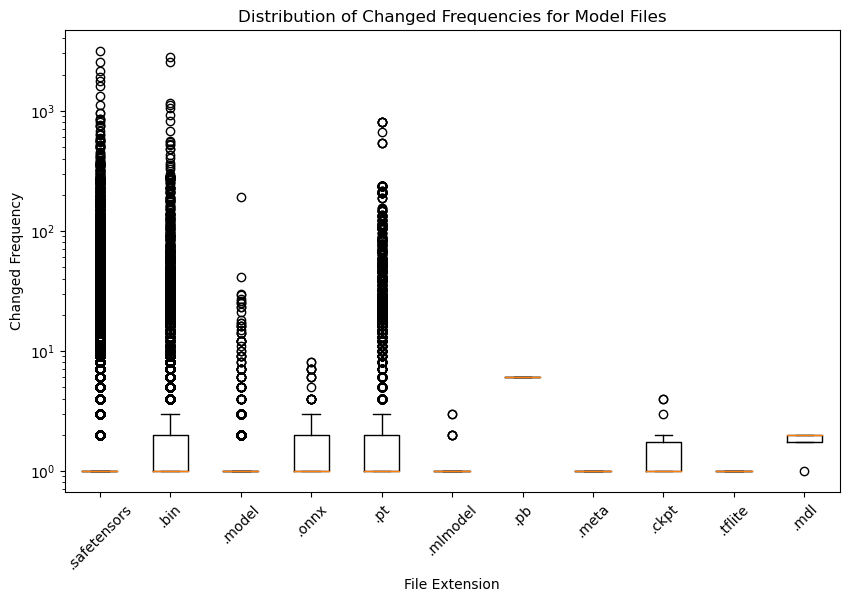

In [114]:
plt.figure(figsize=(10, 6))
plt.boxplot([model_files[model_files['file_extension'] == ext]['changed_frequency'] for ext in model_files['file_extension'].unique()],
            labels=model_files['file_extension'].unique())
plt.title('Distribution of Changed Frequencies for Model Files')
plt.xlabel('File Extension')
plt.ylabel('Changed Frequency')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

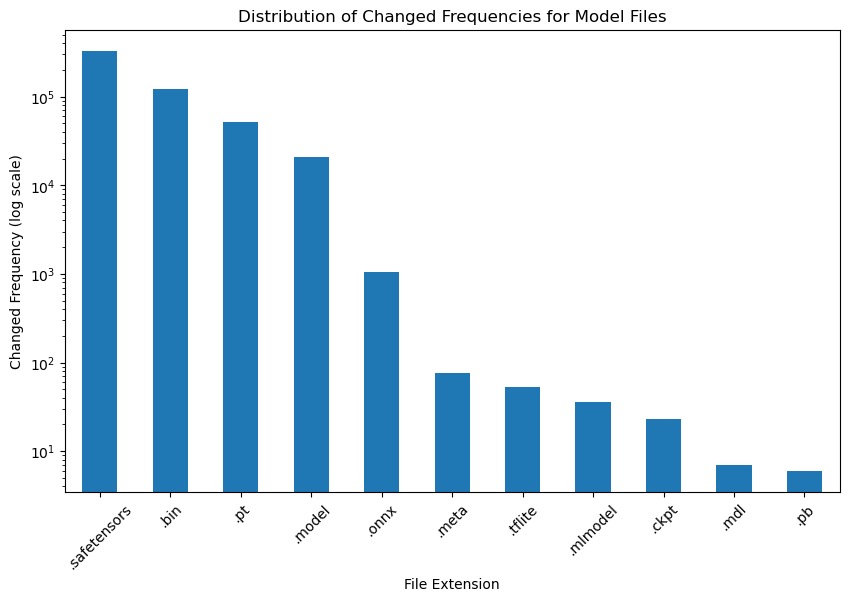

In [115]:
change_frequency = model_files.groupby('file_extension')['changed_frequency'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
change_frequency.plot(kind='bar')
plt.title('Distribution of Changed Frequencies for Model Files')
plt.xlabel('File Extension')
plt.ylabel('Changed Frequency (log scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45)
plt.show()

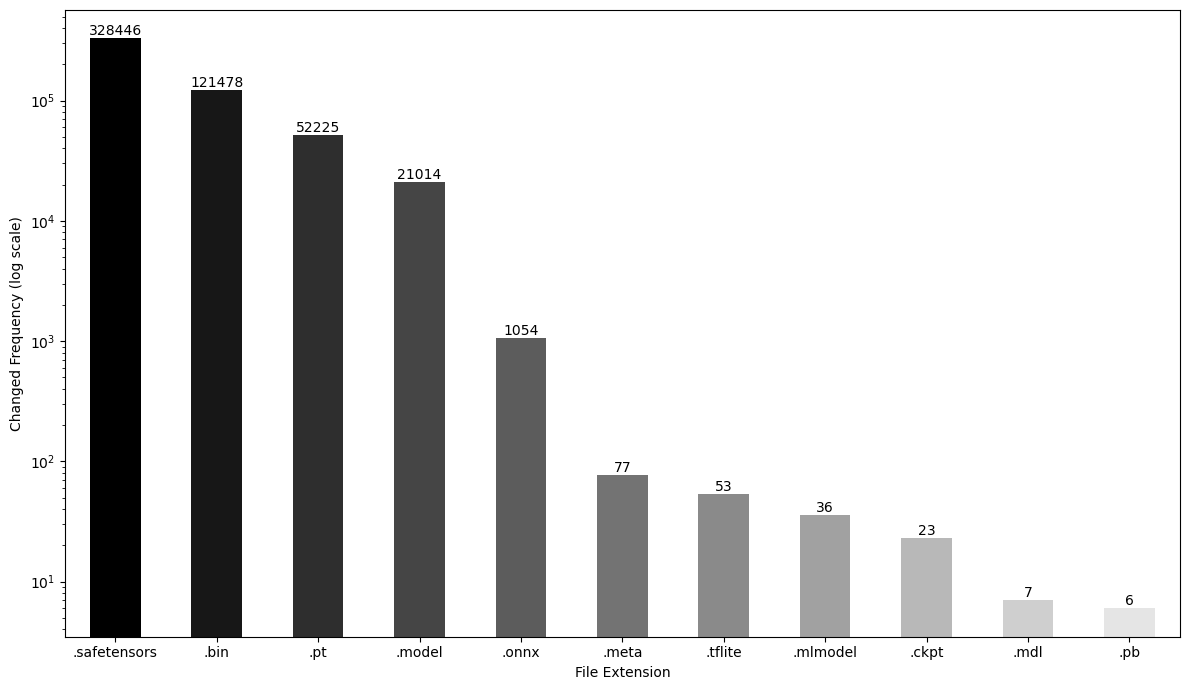

In [130]:
change_frequency = model_files.groupby('file_extension')['changed_frequency'].sum().sort_values(ascending=False)

# Define shades of black with varying opacity levels
num_bars = len(change_frequency)
alphas = np.linspace(0.1, 1, num_bars)
black_colors = [(0, 0, 0, alpha) for alpha in alphas[::-1]]  # Reverse the alpha values

# Create a bar plot with shades of black
plt.figure(figsize=(12, 7))  # Adjust the figure width and height
ax = change_frequency.plot(kind='bar', color=black_colors)
#plt.title('Distribution of Changed Frequencies for Model Files')
plt.xlabel('File Extension')
plt.ylabel('Changed Frequency (log scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(np.arange(len(change_frequency)), change_frequency.index, rotation=0, ha='center')  # Center x-axis labels under each bar
plt.xlabel('File Extension')  # Add x-axis label

# Annotate each bar with its corresponding sum value
for i, v in enumerate(change_frequency):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("model_file_extension.pdf")
plt.show()

In [132]:
change_frequency

file_extension
.safetensors    328446
.bin            121478
.pt              52225
.model           21014
.onnx             1054
.meta               77
.tflite             53
.mlmodel            36
.ckpt               23
.mdl                 7
.pb                  6
Name: changed_frequency, dtype: int64

In [131]:
model_name_change = model_files.groupby('file_extension')['model_name'].nunique()
total_model = sum(model_name_change)

model_owner_change = model_files.groupby('file_extension')['owner'].nunique()
total_owner = sum(model_owner_change)

model_percentage = (model_name_change/total_model)*100
owner_percentage = (model_owner_change/total_owner)*100

print(model_percentage)
print(owner_percentage)

file_extension
.bin            25.896562
.ckpt            0.011958
.mdl             0.004783
.meta            0.028700
.mlmodel         0.029895
.model          21.904933
.onnx            0.294170
.pb              0.001196
.pt              1.956353
.safetensors    49.853513
.tflite          0.017937
Name: model_name, dtype: float64
file_extension
.bin            32.155840
.ckpt            0.025704
.mdl             0.003672
.meta            0.044064
.mlmodel         0.077112
.model          18.363750
.onnx            0.396578
.pb              0.003672
.pt              3.073477
.safetensors    45.786362
.tflite          0.069768
Name: owner, dtype: float64


In [136]:
modelfile_change_file = model_files.groupby('file_extension')['changed_frequency'].sum()
modelfile_model = model_files.groupby('file_extension')['model_name'].nunique()
avg_modelfile = modelfile_change_file/modelfile_model

avg_modelfile


file_extension
.bin             5.609438
.ckpt            2.300000
.mdl             1.750000
.meta            3.208333
.mlmodel         1.440000
.model           1.147178
.onnx            4.284553
.pb              6.000000
.pt             31.922372
.safetensors     7.878292
.tflite          3.533333
dtype: float64

In [133]:

file_extension  the frequency of changes made to each file
.safetensors    328446
.bin            121478
.pt              52225
.model           21014
.onnx             1054
.meta               77
.tflite             53
.mlmodel            36
.ckpt               23
.mdl                 7
.pb                  6

file_extension  percentage of models that changed the file
.bin            25.896562
.ckpt            0.011958
.mdl             0.004783
.meta            0.028700
.mlmodel         0.029895
.model          21.904933
.onnx            0.294170
.pb              0.001196
.pt              1.956353
.safetensors    49.853513
.tflite          0.017937


file_extension  percentage of owners that changed the files
.bin            32.155840
.ckpt            0.025704
.mdl             0.003672
.meta            0.044064
.mlmodel         0.077112
.model          18.363750
.onnx            0.396578
.pb              0.003672
.pt              3.073477
.safetensors    45.786362
.tflite          0.069768
Name: owner, dtype: float64

SyntaxError: invalid syntax (2518183961.py, line 1)

In [ ]:
file_extension
.safetensors 
.bin  
.pt  
.model 
.onnx  
.meta   
.tflite  
.mlmodel 
.ckpt 
.mdl
.pb     